In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # noqa: F401 unused import
%matplotlib inline

## Question 1

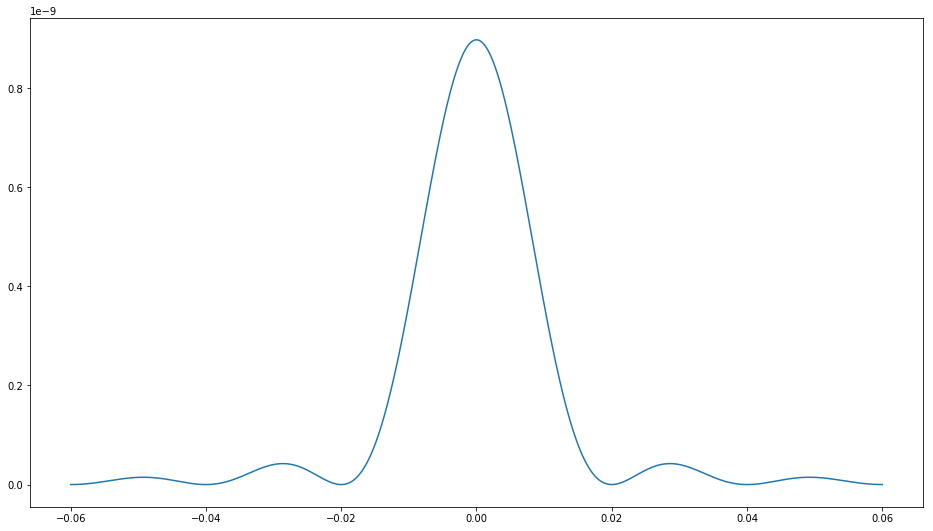

In [18]:
#Constants and Functions
wavelength = 0.6e-6
k = 2*np.pi/wavelength
dx = 30e-6/1001
L = 15e-6
z = 1
def delta(y,x):
    return np.sqrt(z**2+(y-x)**2) - z
def f(y,x):
    const = ((z**2+y**2)**(-1/2))*((-L)**L)
    d_xs = np.exp(1j*k*delta(y,x))
    intergral = np.trapz(d_xs,dx=dx) # Trapizod Method
    return intergral*const
def i(ys,x):
    rtn = []
    for y in ys:
        rtn.append(np.absolute(f(y,x))**2)
    return rtn
ys = np.linspace(-0.06,0.06,1001)
xs = np.linspace(-X,X,1001)
i_y = i(ys,xs)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(ys,i_y)
plt.show()

The above graph follows the expected single slit diffraction pattern of light with the given base parameters
## Question 2

In [36]:
data = np.loadtxt('drag_test_data.dat').T
velocity = data[0]
force = data[1]
### Constants
rho = 1.225
### Functions
def F(v,c,Ap):
    return c*f1(v) + Ap*f2(v)
def f1(v):
    return v**(-2)
def f2(v):
    return (rho/2)*(v**2)

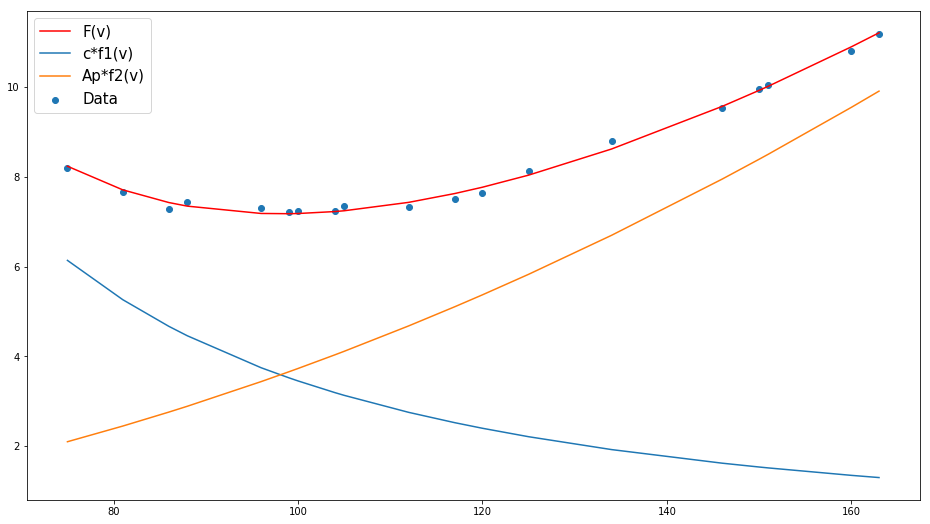

C -  338865449.15780246 Ap - 5.976242382321668


In [61]:
f_1 = f1(velocity)
f_2 = f2(velocity)
b = [np.sum(f_1*force),np.sum(f_2*force)]
A = [[np.sum(f_1*f_1),np.sum(f_1*f_2)],[np.sum(f_2*f_1),np.sum(f_2*f_2)]]
c,Ap = np.linalg.solve(A,b)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.scatter(velocity,force/9.81e3)
plt.plot(velocity,F(velocity,c,Ap)/9.81e3,'red')
plt.plot(velocity,c*f1(velocity)/9.81e3)
plt.plot(velocity,Ap*f2(velocity)/9.81e3)
axes = plt.gca()
axes.legend(['F(v)','c*f1(v)','Ap*f2(v)','Data'],loc=2,prop={'size': 15})
plt.show()
print("C - ",c,"Ap -",Ap)

Using the above C and Ap values, I will be completing the required equations and analytically differentiating and finding the minima for each of these values

## Equation 1

$$Power = \frac{338865449.15780246}{v} + (3.66044845917202165\times v^3)$$

$$Power' = \frac{-338865449.15780246}{v^2} + (3\times 3.66044845917202165\times v^2) $$

$$\implies \frac{-338865449.15780246 + 3\times 3.66044845917202165\times v^4}{v^2} = 0 $$

$$\implies 3\times 3.66044845917202165 \times v^4 = 338865449.15780246 $$

$$\implies v^4 = \frac{338865449.15780246}{3\times  3.66044845917202165 } $$

$$\implies v = \pm  74.5320273821954173 $$

$$Power'' = \frac{-2\times-338865449.15780246}{v^3} + {6\times 3.66044845917202165\times v } $$

$$Power''(74.5320273821954173) = 3273.8477374814897 \text{ and } Power''(-74.5320273821954173) = -3273.8477374814897 $$

**As 74.5320273821954173 gives postive value at second derrivate, it is the minima point of the function.**


## Equation 2

$$ F(vDrag) = \frac{338865449.15780246}{v^2} + (3.66044845917202165\times v^2)  $$

$$ F'(vDrag) = \frac{-2\times338865449.15780246}{v^3} + (2\times3.66044845917202165\times v) $$

$$\implies  \frac{-2\times338865449.15780246}{v^3} + (2\times3.66044845917202165\times v) = 0 $$

$$\implies \frac{-2\times338865449.15780246 + 2\times3.66044845917202165\times v^4}{v^3} = 0 $$

$$\implies -2\times338865449.15780246 + 2\times3.66044845917202165\times v^4 = 0 $$

$$\implies v^4 = \frac{2\times338865449.15780246}{2\times3.66044845917202165} $$

$$\implies v = \pm 98.0896643703709744 $$

$$F''(vDrag) = 7.32089691834404330 + \frac{2.0331926949468148\times 10^9}{v^4} $$

$$F''(98.0896643703709744) = 29.283587673376174 \text{ and } F''(-98.0896643703709744) = 29.283587673376174 $$

$$F''(\pm 98.0896643703709744) > 0$$ **As the above is possitve, there are two minimas at** $$vDrag = \pm 98.0896643703709744 $$

## Equation 3

$$ Carson Speed = \frac{338865449.15780246}{v^3} + (3.66044845917202165\times v) $$

$$Carson Speed' = \frac{-3\times338865449.15780246}{v^4} + 3.66044845917202165 $$

$$\implies \frac{3\times338865449.15780246}{v^4} = 3.66044845917202165 $$

$$\implies \frac{1}{v^4} = \frac{ 3.66044845917202165}{3\times338865449.15780246} $$

$$\implies v = \pm 228.71595896637645 $$

$$Carson Speed'' = \frac{4.0663853898936295\times 10^9}{v^5} $$

$$Carson Speed''(228.71595896637645) = 0.006497199325748931 \text{ and } Carson Speed''(-228.71595896637645) = -0.006497199325748931 $$

**Hence minima of the function is at 228.71595896637645**


## Question 3

By expanding eulers method to 4th order by taking extra terms of taylor series

$$y_{i+1} = y_i +f(x_i,y_i)h + \frac{1}{2} \times f'(x_i,y_i)h^2 +\frac{1}{3!}\times f''(x_i,y_i)h^3 + \frac{1}{4!}\times f'''(x_i,y_i)h^4 $$

In [64]:
b = 8/3
s = 10
r = 28
def dx(x,y,z):
    return s*(y-x)
def dy(x,y,z):
    return x*(r-z) -y
def dz(x,y,z):
    return x*y - b*z
def rk4(a,b,c,dt):
    func = np.array([dx,dy,dz])
    k1,k2,k3,k4 = [],[],[],[]
    """
    Below code segement is a bit messy, but essentiall it finds the ki value for each [dx,dy,dz] and
    stores them in a list to be used later for the ki+1 value cacluation.
    """
    for f in func:
        k1.append(dt*f(a,b,c))
    for f in func:
        k2.append(dt*f(a+k1[0]/2,b+k1[1]/2,c+k1[2]/2))
    for f in func:
        k3.append( dt*f(a+k2[0]/2,b+k2[1]/2,c+k2[2]/2))
    for f in func:
        k4.append( dt*f(a+k3[0],b+k3[1],c+k3[1]))
    k1,k2,k3,k4 = np.array(k1),np.array(k2),np.array(k3),np.array(k4)
    return (1/6)*(k1+k2+k3+k4)

In [65]:
def lorenz(x0,y0,z0):
    x,y,z = [x0],[y0],[z0]
    count = 0
    t = 0
    dt = 0.01
    while t < 150:
        t+= dt
        tempx,tempy,tempz = x[count],y[count],z[count]
        runge_kutta_4 = rk4(tempx,tempy,tempz,dt)
        tempx += runge_kutta_4[0]
        tempy += runge_kutta_4[1]
        tempz += runge_kutta_4[2]
        count +=1
        x.append(tempx)
        y.append(tempy)
        z.append(tempz)
    return x,y,z

Text(0.5, 0.92, 'Lorenz Attractor')

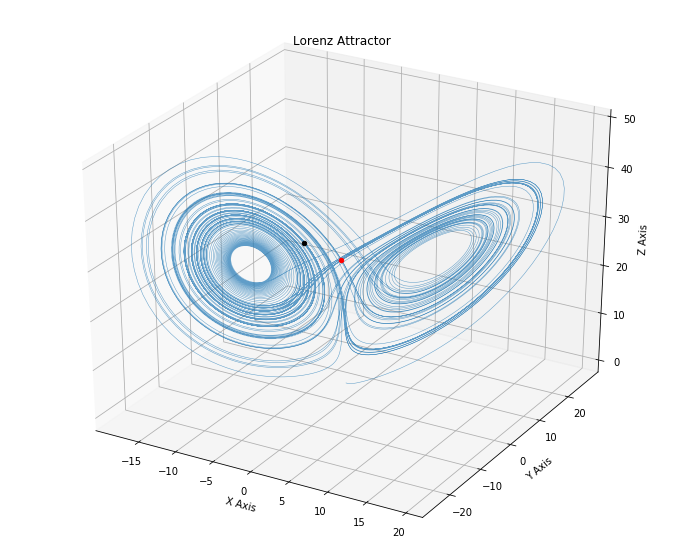

In [67]:
x,y,z = lorenz(0,1,1.05)
x_1,y_1,z_1 = lorenz(0,0.9,1.04)
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
# now use the values stored in 1-D arrays xs, ys, zs
ax.plot(x, y, z, lw=0.5,alpha=0.7)
ax.scatter(x[-1],y[-1],z[-1],color=(1,0,0))
ax.scatter(x_1[-1],y_1[-1],z_1[-1],color=(0,0,0))
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

The two different points of color red and black show the random motion of the points even by just slight alteration in their starting postion, as would be predicted by the butterfly effect.

## Question 4


-0.199721927105153 +- 0.01323681615474773 x + 1.7047135316296602 +- 0.08283105063096383


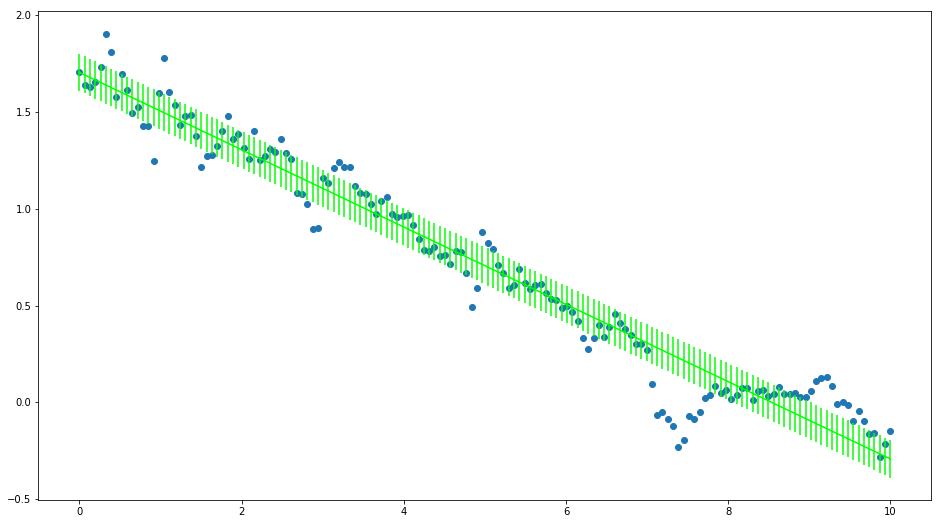

In [3]:
y_obs = np.loadtxt('hist_data2.dat',delimiter=',').T[1]
x = np.linspace(0,10,len(y_obs))
std = np.std(y_obs)
M = 25
a,b = np.polyfit(x,y_obs,1) 
def pertubation():
    mu = 0
    choices = np.random.normal(mu,std,len(y_obs))
    return y_obs + choices
a_err = np.zeros(M);b_err = np.zeros(M)
for i in range(M):
    copy = pertubation()
    a_err[i],b_err[i] = np.polyfit(x,copy,1)
std_a,std_b = np.std(a_err), np.std(b_err)
print(a,"+-",np.std(a_err),"x +",b,"+-",np.std(b_err))
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.scatter(x,y_obs)
plt.errorbar(x,a*x+b,std_a + std_b,color=(0,1,0))
plt.show()

By pertubating the data, we are trying to reduce the effect of random error on the experiment and would be similiar to conducting the experiment on another day. Futhermore, by making sure the pertubated data has the same standard deviation as the experimental data, we ensure we aren't distorting the significance of the data. This enables the calculation of the error bars for the trend line for the data.